In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
%matplotlib inline
import plotly.express as px
warnings.filterwarnings('ignore')
import nbformat
from nbconvert import PythonExporter
import os
import sys
import plotly.io as pio
pio.renderers.default = "browser"
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## A- Data Cleaning and Preprocessing

## data cleaning for Customer_data.xlsx

In [2]:
## Load raw data from workbook excel file then select the required sheet to pandas dataframes
cus_data = pd.read_excel('/run/media/yassien/Data/Data since/Epsilon AI/DSP/final_project/Raw_data.xlsx', sheet_name='customer_data')

In [3]:
## Display dataframe info, as we have 12 columns and 3999 rows in our dataframe
cus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [4]:
## Check for missing values
cus_data.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [5]:
## dropping default column since it has strange characters
## standardizing column names to lower case and replacing spaces with underscores
## filling missing values in last_name, job_title, job_industry_category columns by replacing the missing values with word 'missing' so we can gather those missing information from customer later then the columns can be used in model training
cus_data.drop(['default'], axis=1, inplace=True)
cus_data.columns = cus_data.columns.str.lower().str.replace(' ', '_')
cus_data[['last_name','job_title','job_industry_category']] = cus_data[['last_name','job_title','job_industry_category']].fillna('missing')

In [6]:
## missing values in dob can't containe strings objects so we can use it in mathimatical operations, so we will index all missing indices values in dob column and drop them in the next step
cus_data[cus_data['dob'].isna()].index

Index([ 143,  167,  266,  289,  450,  452,  453,  479,  512,  525,  547,  581,
        598,  679,  684,  798,  838,  882,  891,  949,  974,  982,  995, 1037,
       1043, 1081, 1173, 1209, 1243, 1350, 1476, 1508, 1582, 1627, 1682, 1739,
       1772, 1779, 1805, 1917, 1937, 1989, 1999, 2020, 2068, 2164, 2204, 2251,
       2294, 2334, 2340, 2413, 2425, 2468, 2539, 2641, 2646, 2695, 2696, 2853,
       2919, 2962, 2998, 3011, 3085, 3150, 3221, 3222, 3254, 3287, 3297, 3311,
       3321, 3342, 3364, 3472, 3509, 3512, 3564, 3653, 3717, 3726, 3778, 3882,
       3930, 3934, 3997],
      dtype='int64')

In [7]:
## drop all missing values in dob (87 row) since it's a small portion of the data then convert it to datetime format so we can use it in mathimatical operations
cus_data.drop(cus_data[cus_data['dob'].isna()].index, inplace=True)
cus_data['dob'] = pd.to_datetime(cus_data['dob'])
cus_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3913 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int64         
 1   first_name                           3913 non-null   object        
 2   last_name                            3913 non-null   object        
 3   gender                               3913 non-null   object        
 4   past_3_years_bike_related_purchases  3913 non-null   int64         
 5   dob                                  3913 non-null   datetime64[ns]
 6   job_title                            3913 non-null   object        
 7   job_industry_category                3913 non-null   object        
 8   wealth_segment                       3913 non-null   object        
 9   deceased_indicator                   3913 non-null   object        
 10  owns_car         

In [8]:
## after cleaning and converting dob column to datetime format, I created a new column "age" by subtracting current year from the year in dob column
cus_data['age'] = pd.to_datetime('today').year - cus_data['dob'].dt.year

In [9]:
##  Check again for any missing values in the intire dataframe
cus_data.isna().sum()
cus_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3913 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int64         
 1   first_name                           3913 non-null   object        
 2   last_name                            3913 non-null   object        
 3   gender                               3913 non-null   object        
 4   past_3_years_bike_related_purchases  3913 non-null   int64         
 5   dob                                  3913 non-null   datetime64[ns]
 6   job_title                            3913 non-null   object        
 7   job_industry_category                3913 non-null   object        
 8   wealth_segment                       3913 non-null   object        
 9   deceased_indicator                   3913 non-null   object        
 10  owns_car         

count    3913.000000
mean       47.969333
std        12.796387
min        23.000000
25%        38.000000
50%        48.000000
75%        57.000000
max       182.000000
Name: age, dtype: float64

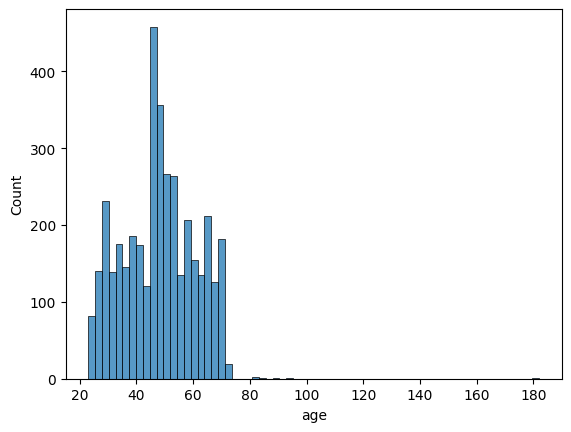

In [10]:
## plotting the age distribution, then we can flag any outliers in the column
sns.histplot(cus_data['age'])
cus_data['age'].describe()

In [11]:
## after noticing that only one customer has age of 182 years which is considered an outlier, I will index it then drop it from age column.
cus_data[cus_data['age'] >100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,182


In [12]:
## dropping the outlier from age column
cus_data.drop(cus_data[cus_data['age'] > 100].index, inplace=True)

In [13]:
## checking the categorical columns statistics
cus_data.describe(include='object')

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car
count,3912,3912,3912,3912,3912,3912,3912,3912
unique,3078,3647,5,196,10,3,2,2
top,Tobe,missing,Female,missing,Manufacturing,Mass Customer,N,Yes
freq,5,121,2037,497,796,1954,3910,1974


In [14]:
## checking the unique values in "owns_car" columns
cus_data['owns_car'].value_counts()

owns_car
Yes    1974
No     1938
Name: count, dtype: int64

In [15]:
## checking the unique values in "gender" columns
cus_data['gender'].value_counts()


gender
Female    2037
Male      1872
F            1
Femal        1
M            1
Name: count, dtype: int64

In [16]:
## we see inconsistent data in "gender" column, as some values were misspelled  like "Femal" or abbreviated "F  & M". So I defined a function to standardize and unify those values to be either "Male" or "Female"

def clean_gender(x):
    if x in  ['F', 'Femal']:
        return 'Female'
    elif x == 'M':
        return 'Male'

    else :
        return x

cus_data['gender'] = cus_data['gender'].apply(clean_gender)

In [17]:
## recheck the unique values in "gender" column after applying the function
cus_data['gender'].value_counts()


gender
Female    2039
Male      1873
Name: count, dtype: int64

In [18]:
## checking the unique values in "wealth_segment" columns
cus_data['wealth_segment'].value_counts()

wealth_segment
Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: count, dtype: int64

In [19]:
## checking for any duplication in the dataframe
cus_data.duplicated().sum()

np.int64(0)

In [20]:
## Exporting the cleaned customer demographic sheet into a separated and new csv file
cus_data.to_csv('/run/media/yassien/Data/Data since/Epsilon AI/DSP/final_project/Raw_data_customer_data_cleaned.csv', index=False)

## data cleaning and preprocessing for Customer Address

In [21]:
## data cleaning and preprocessing for CustomerAddress sheet
## Load raw data from workbook excel file then select the customer address sheet to pandas dataframe
cus_add = pd.read_excel("/run/media/yassien/Data/Data since/Epsilon AI/DSP/final_project/Raw_data.xlsx", sheet_name="customer_address")
cus_add.sample(5)

,customer_id,address,postcode,state,country,property_valuation
2883,2888,5674 Superior Point,2528,NSW,Australia,7
2413,2418,31168 Messerschmidt Street,3024,VIC,Australia,5
2356,2361,89 Pawling Court,4020,QLD,Australia,7
634,639,44 Upham Crossing,2148,NSW,Australia,7
2093,2098,794 Kennedy Court,4740,QLD,Australia,2


In [22]:
## Display dataframe info and check for any missing values
cus_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [23]:
## checking the unique values in "country" columns
cus_add['country'].value_counts()

country
Australia    3999
Name: count, dtype: int64

In [24]:
## checking the unique values in "state" columns
cus_add['state'].value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

In [25]:
## we see inconsistent data in "state" column, as some values were not abbreviated like "New South Wales" or "Victoria". So I defined a function to standardize and unify those values to be either NSW, VIC or QLD

def clean_state(x):
    if x == 'New South Wales':
        return 'NSW'
    elif x == 'Victoria':
        return 'VIC'
    else:
        return x
cus_add['state'] = cus_add['state'].apply(clean_state)

In [26]:
## checking the unique values in "state" columns after applying the function
cus_add['state'].value_counts()

state
NSW    2140
VIC    1021
QLD     838
Name: count, dtype: int64

In [27]:
## checking for any duplication in the dataframe
cus_add.duplicated().sum()

np.int64(0)

In [28]:
## Exporting the cleaned customer address sheet into a separated and new csv file
cus_add.to_csv("/run/media/yassien/Data/Data since/Epsilon AI/DSP/final_project/Raw_data_cus_address_cleaned.csv", index=False)

## data cleaning and preprocessing for Transactions

In [29]:
## Load raw data from workbook excel file then select the Transactions sheet to pandas dataframe
cust_trans = pd.read_excel("/run/media/yassien/Data/Data since/Epsilon AI/DSP/final_project/Raw_data.xlsx", sheet_name="transactions")

In [30]:
## Display dataframe info and check for any missing values
cust_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [31]:
## checking for any duplication in the dataframe
cust_trans.duplicated().sum()

np.int64(0)

In [32]:
## checking for any missing values
cust_trans.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [33]:
## checking the unique values in "online_order" columns
cust_trans['online_order'].value_counts()

online_order
1.0    9829
0.0    9811
Name: count, dtype: int64

In [34]:
## filling the missing values in "online_order" column by replacing the missing values with the mode of the column since online orders are the most frequent type of orders
cust_trans['online_order'].fillna(cust_trans['online_order'].mode()[0], inplace=True)

In [35]:
## checking the missing values in "brand" column
cust_trans[cust_trans['brand'].isna()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaN
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaN
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN


In [36]:
## indexing all missing indices values in brand column so we can drop them in the next step
cust_trans[cust_trans['brand'].isna()].index

Index([  136,   159,   366,   406,   676,   780,  1003,  1130,  1196,  1282,
       ...
       19045, 19132, 19176, 19196, 19205, 19340, 19383, 19793, 19859, 19871],
      dtype='int64', length=197)

In [37]:
## dropping all missing values in brand column since brand is a crucial information for our analysis
cust_trans.drop(cust_trans[cust_trans['brand'].isna()].index, inplace=True)

In [38]:
## checking for any missing values in the dataframe after cleaning
cust_trans.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [39]:
## converting "product_first_sold_date" columns to datetime format so we can use them in mathimatical operations
cust_trans['product_first_sold_date'] = pd.to_datetime(cust_trans['product_first_sold_date'])

In [40]:
## creating a new column "profit" by subtracting standard_cost from list_price
cust_trans['profit'] = cust_trans['list_price'] - cust_trans['standard_cost']

In [41]:
## Display dataframe info and check for any missing values
cust_trans.info()
cust_trans.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 19803 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19803 non-null  float64       
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 non-nu

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
profit                     0
dtype: int64

In [42]:
## Exporting the cleaned transaction sheet into a separated and new csv file
cust_trans.to_csv("/run/media/yassien/Data/Data since/Epsilon AI/DSP/final_project/Raw_data_transaction_cleaned.csv", index=False)

## Business Objective question: Can we predict which customers are likely to churn (stop purchasing)?
### By predicting churn, the company can identify customers that likely to leave the company and then take a proactive actions (e.g., targeted marketing, offers) to retain them

### Define the customers that are likely to stop purchasing (churned customers)
### We can define churned customers as those who have not made any purchases in the last 3 months from the most recent transaction date in the dataset.

In [43]:
## merging the two cleaned dataframes into one dataframe using inner join to keep only the customers who have transactions

df = pd.merge(cus_data, cust_trans, on='customer_id', how='inner')
df.to_csv("/run/media/yassien/Data/Data since/Epsilon AI/DSP/final_project/merged_cleaned_data.csv", index=False)
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01 00:00:00.000038482,110.56
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,1970-01-01 00:00:00.000039526,751.02
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,1970-01-01 00:00:00.000037823,189.28
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,1970-01-01 00:00:00.000037873,90.10
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000038573,17.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19349,3500,Josy,Fleeman,Female,71,1967-07-21,missing,Entertainment,Affluent Customer,N,...,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,1970-01-01 00:00:00.000033879,198.22
19350,3500,Josy,Fleeman,Female,71,1967-07-21,missing,Entertainment,Affluent Customer,N,...,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,1970-01-01 00:00:00.000036668,827.16
19351,3500,Josy,Fleeman,Female,71,1967-07-21,missing,Entertainment,Affluent Customer,N,...,0.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,1970-01-01 00:00:00.000033888,144.26
19352,3500,Josy,Fleeman,Female,71,1967-07-21,missing,Entertainment,Affluent Customer,N,...,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,1970-01-01 00:00:00.000034165,15.08


## B- creating churn prediction labeling

In [44]:
## 1- defined a cutoff date and set it to 01-oct-2017 since my data ends at 31-dec-2017, so customers who didn't make any purchases during last 3 months (october, november, december) are considered churned customers.


## 2- after that I created a new column "churn" and set it to 1 for churned customers who likely will leave and 0 for active customers, by checking if the most recent transaction date for each customer is before the cutoff date, then set it to  intger type so we can use it in classification models.

cutoff_date = dt.datetime(2017,10,1)

df['churn'] = (df.groupby('customer_id')['transaction_date'].transform(max) < cutoff_date ).astype(int)
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,churn
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01 00:00:00.000038482,110.56,0
1,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Solex,Standard,medium,medium,1577.53,826.51,1970-01-01 00:00:00.000039526,751.02,0
2,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,1970-01-01 00:00:00.000037823,189.28,0
3,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,1970-01-01 00:00:00.000037873,90.10,0
4,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000038573,17.87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19349,3500,Josy,Fleeman,Female,71,1967-07-21,missing,Entertainment,Affluent Customer,N,...,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,1970-01-01 00:00:00.000033879,198.22,1
19350,3500,Josy,Fleeman,Female,71,1967-07-21,missing,Entertainment,Affluent Customer,N,...,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,1970-01-01 00:00:00.000036668,827.16,1
19351,3500,Josy,Fleeman,Female,71,1967-07-21,missing,Entertainment,Affluent Customer,N,...,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,1970-01-01 00:00:00.000033888,144.26,1
19352,3500,Josy,Fleeman,Female,71,1967-07-21,missing,Entertainment,Affluent Customer,N,...,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,1970-01-01 00:00:00.000034165,15.08,1


## C- creating customer summary table and feature engineering

In [45]:
## creating a customer summary dataframe by grouping the main dataframe by customer_id and aggregating the required columns
## calculating age by subtracting dob from current date then converting it to years

df['age'] = (dt.datetime.now() - df['dob']).dt.days // 365

cust_summary = df.groupby('customer_id').agg({
    'transaction_id': 'nunique',
    'list_price': 'sum',
    'profit': 'sum',
    'transaction_date': 'max',
    'churn': 'max',
    'age': 'first',
    'gender' : 'first',
    'job_industry_category' : 'first',
    'wealth_segment' : 'first',
    'owns_car' : 'first',
}).reset_index()

In [ ]:
## rename the columns to more descriptive names
cust_summary.rename(columns={
    'transaction_id': 'frequency',
    'list_price': 'total_spent',
    'profit': 'total_profit',
    'transaction_date': 'last_purchase'
}, inplace=True)

In [47]:
## adding a future columns like age, avg_spend_per_trans, profit_margin, recency, high_value_cust

# Average spend per transaction
cust_summary['avg_spend_per_trans'] = cust_summary['total_spent'] / cust_summary['frequency']


# Profit margin
cust_summary['profit_margin'] = cust_summary['total_profit'] / cust_summary['total_spent']


# Recency (days since last purchase, using dataset end date 2017-12-31)
ref_date = dt.datetime(2017,12,31)

cust_summary['recency'] = (ref_date - cust_summary['last_purchase']).dt.days


# High-value customers (top 25% spenders)
threshold = cust_summary['total_spent'].quantile(0.75)

cust_summary['high_value_cust'] = (cust_summary['total_spent'] > threshold).astype(int)

## D- Exploratory Data Analysis (EDA)

## 1- How many customers are churned vs active customers?

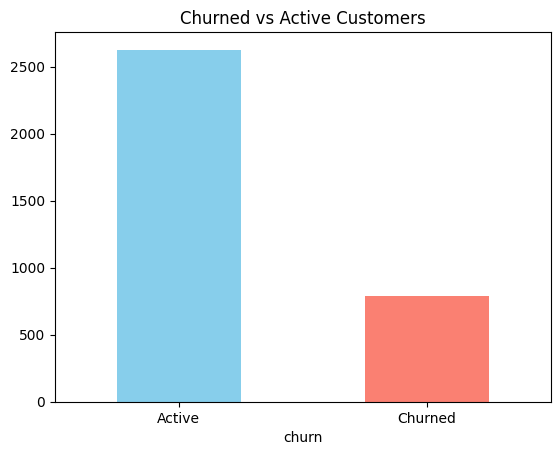

In [48]:
cust_summary['churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churned vs Active Customers')
plt.xticks(ticks=[0, 1], labels=['Active', 'Churned'], rotation=0)
plt.show()

## 2- Do churned customers have fewer transactions?

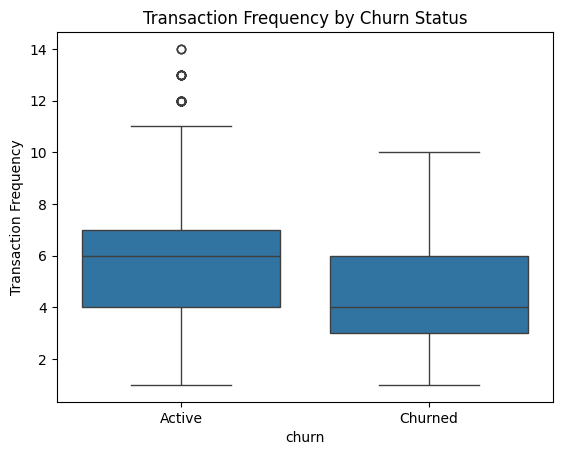

In [49]:
sns.boxplot(x='churn', y='frequency', data=cust_summary)
plt.title('Transaction Frequency by Churn Status')
plt.xticks(ticks=[0, 1], labels=['Active', 'Churned'], rotation=0)
plt.ylabel('Transaction Frequency')
plt.show()

## 3- Do churned customers spend less money?

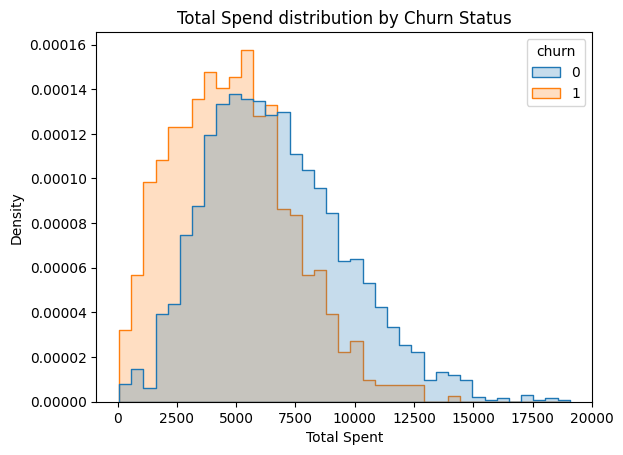

In [50]:
sns.histplot(data=cust_summary, x='total_spent', hue='churn', element='step', stat='density', common_norm=False)
plt.title('Total Spend distribution by Churn Status')
plt.xlabel('Total Spent')
plt.show()

## 4- Are churned customers less recent?

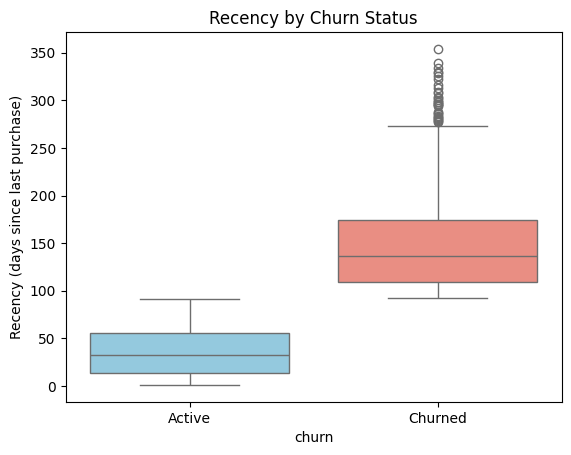

In [51]:
ref_date = dt.datetime(2017,12,31)
cust_summary['recency'] = (ref_date - cust_summary['last_purchase']).dt.days

sns.boxplot(x='churn', y='recency', data=cust_summary, palette=['skyblue', 'salmon'])
plt.title('Recency by Churn Status')
plt.xticks(ticks=[0, 1], labels=['Active', 'Churned'], rotation=0)
plt.ylabel('Recency (days since last purchase)')
plt.show()

## 5- Does age affect churn?

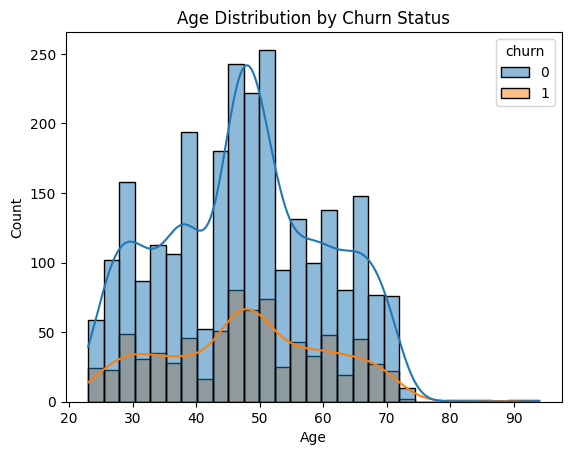

In [52]:
sns.histplot(data=cust_summary, x='age', hue='churn', kde= True)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.show()

## 6- Does churn differ by gender / wealth segment / industry?

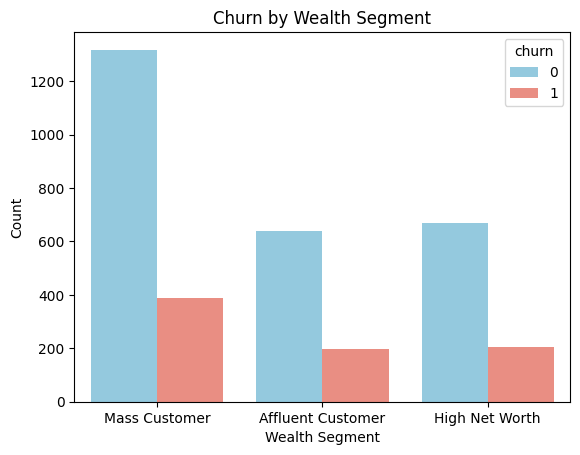

In [53]:
sns.countplot(x='wealth_segment', hue='churn', data=cust_summary, palette=['skyblue', 'salmon'])
plt.title('Churn by Wealth Segment')
plt.xlabel('Wealth Segment')
plt.ylabel('Count')
plt.show()

## 7- Which numeric features are correlated with churn?

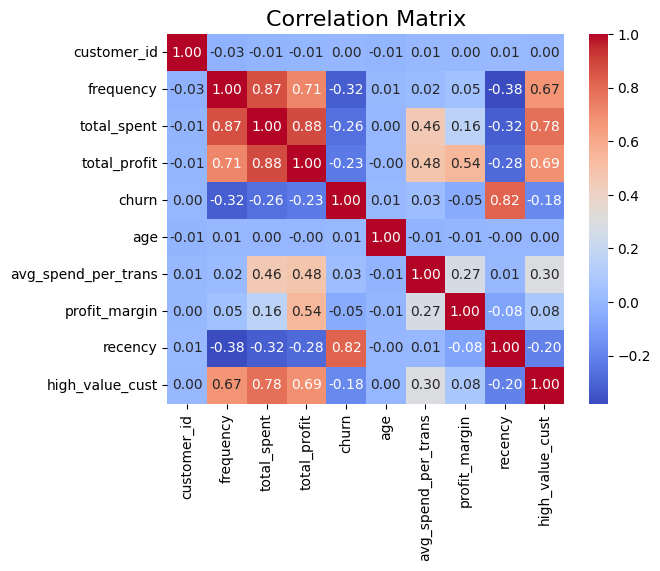

In [54]:
numeric_cols = cust_summary.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=16 , rotation=0)
plt.show()

## E- Training, test & splitting the data

In [55]:
## 1- importing necessary libraries for modeling.
## 2- splitting the data into features (X) and target / churn variable (y)

from sklearn.model_selection import train_test_split


cust_summary['avg_spent_per_txn'] = cust_summary['total_spent'] / cust_summary['frequency']

cust_summary['profit_margin'] = cust_summary['total_profit'] / cust_summary['total_spent']



features = ['frequency','total_spent','total_profit','avg_spent_per_txn','profit_margin','age','gender','wealth_segment','owns_car','job_industry_category']

X = cust_summary[features].copy()
y = cust_summary['churn'].copy()



# Fill missing values for numeric columns with their median
numeric_features = ['frequency','total_spent','total_profit','avg_spent_per_txn','profit_margin','age']
X[numeric_features] = X[numeric_features].fillna(X[numeric_features].median())

# Fill missing values for categorical columns with 'missing'
cat_features = ['gender','wealth_segment','owns_car','job_industry_category']
X[cat_features] = X[cat_features].fillna('missing')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

cust_summary.to_csv("/run/media/yassien/Data/Data since/Epsilon AI/DSP/final_project/customer_summary.csv", index=False)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(2732, 10) (684, 10) (2732,) (684,)


## F- Preprocessing the data for modeling

In [56]:
## 1- Preprocessing the data for modeling
## 2- creating a preprocessing pipeline for both numerical and categorical features
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [57]:
## defining numerical and categorical columns
numeric_features = ['frequency','total_spent','total_profit','avg_spent_per_txn','profit_margin','age']
categorical_features = ['gender','wealth_segment','owns_car','job_industry_category']

In [58]:
## building the preprocessing pipelines for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

## F- testing the preprocessing pipeline and creating the model1 using logistic regression to test it

In [59]:
## pipeline with preprocessing and logistic regression model
model1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

## evaluating the model using classification report, confusion matrix and roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(roc_auc_score(y_test, model1.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       526
           1       0.60      0.15      0.24       158

    accuracy                           0.78       684
   macro avg       0.70      0.56      0.56       684
weighted avg       0.75      0.78      0.73       684

[[510  16]
 [134  24]]
0.7230952495547962


## testing the preprocessing pipeline and creating the model2 using random forest Classifier to test it


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define numeric & categorical features
numeric_features = ['frequency','total_spent','total_profit','avg_spent_per_txn','profit_margin','age']
categorical_features = ['gender','wealth_segment','owns_car','job_industry_category']

# Numeric transformer
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Categorical transformer
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Random Forest pipeline with tweaks
model2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,         # more trees
        random_state=42,
        class_weight='balanced'   # handle class imbalance
    ))
])

# Train
model2.fit(X_train, y_train)

# Predict
y_pred2 = model2.predict(X_test)

# Evaluation
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("\nROC AUC Score:", roc_auc_score(y_test, model2.predict_proba(X_test)[:, 1]))


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.80      0.97      0.87       526
           1       0.61      0.18      0.27       158

    accuracy                           0.78       684
   macro avg       0.70      0.57      0.57       684
weighted avg       0.75      0.78      0.73       684


Confusion Matrix:
 [[508  18]
 [130  28]]

ROC AUC Score: 0.7071701881888628


## testing the preprocessing pipeline and creating the model3 using gradient boosting Classifier to test it

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define numeric & categorical features
numeric_features = ['frequency','total_spent','total_profit','avg_spent_per_txn','profit_margin','age']
categorical_features = ['gender','wealth_segment','owns_car','job_industry_category']

# Numeric transformer
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Categorical transformer
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Gradient Boosting pipeline
model3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

# Train
model3.fit(X_train, y_train)

# Predict
y_pred3 = model3.predict(X_test)

# Evaluation
print("Classification Report (Gradient Boosting):\n", classification_report(y_test, y_pred3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("\nROC AUC Score:", roc_auc_score(y_test, model3.predict_proba(X_test)[:, 1]))

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.80      0.95      0.87       526
           1       0.54      0.21      0.30       158

    accuracy                           0.78       684
   macro avg       0.67      0.58      0.58       684
weighted avg       0.74      0.78      0.74       684


Confusion Matrix:
 [[498  28]
 [125  33]]

ROC AUC Score: 0.7115560475525822


## comparing the models results into a table

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Collect metrics for each model
results = []

# Logistic Regression
y_pred1 = model1.predict(X_test)
results.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred1),
    'Precision': precision_score(y_test, y_pred1),
    'Recall': recall_score(y_test, y_pred1),
    'F1': f1_score(y_test, y_pred1),
    'ROC AUC': roc_auc_score(y_test, model1.predict_proba(X_test)[:,1])
})

# Random Forest
y_pred2 = model2.predict(X_test)
results.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred2),
    'Precision': precision_score(y_test, y_pred2),
    'Recall': recall_score(y_test, y_pred2),
    'F1': f1_score(y_test, y_pred2),
    'ROC AUC': roc_auc_score(y_test, model2.predict_proba(X_test)[:,1])
})

# Gradient Boosting
y_pred3 = model3.predict(X_test)
results.append({
    'Model': 'Gradient Boosting',
    'Accuracy': accuracy_score(y_test, y_pred3),
    'Precision': precision_score(y_test, y_pred3),
    'Recall': recall_score(y_test, y_pred3),
    'F1': f1_score(y_test, y_pred3),
    'ROC AUC': roc_auc_score(y_test, model3.predict_proba(X_test)[:,1])
})

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall        F1   ROC AUC
0  Logistic Regression  0.780702   0.600000  0.151899  0.242424  0.723095
1        Random Forest  0.783626   0.608696  0.177215  0.274510  0.707170
2    Gradient Boosting  0.776316   0.540984  0.208861  0.301370  0.711556


## visualizing the models results into a bar chart using matplotlib

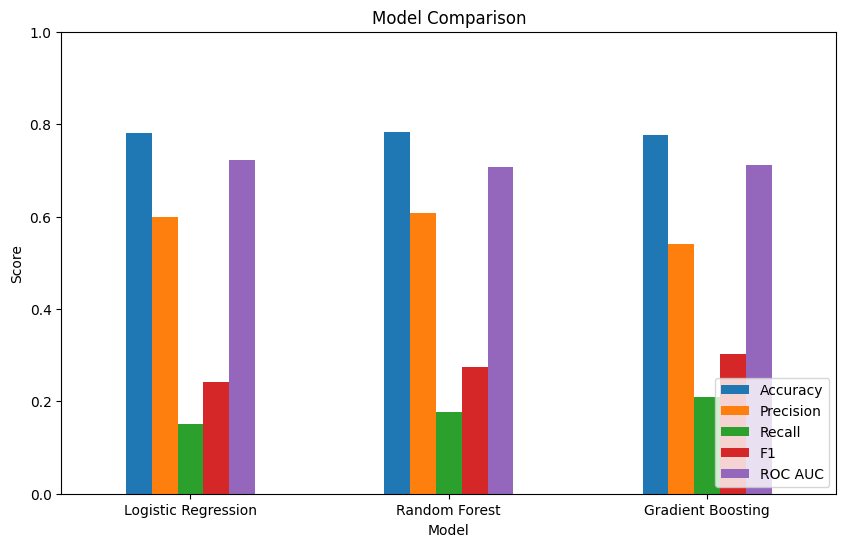

In [63]:

# Plot Accuracy, Recall, F1, ROC AUC for each model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']

results_df.set_index('Model')[metrics].plot(kind='bar', figsize=(10,6))

plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0,1)  # since all metrics are between 0 and 1
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [2, 3, 4]
}

# Pipeline (reuse your preprocessor)
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Grid search
grid_search = GridSearchCV(gb_pipeline, param_grid, 
                           cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC (train CV):", grid_search.best_score_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Test ROC AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[CV] END classifier__learning_rate=0.01, classifier__max_depth=2, classifier__n_estimators=100; total time=   0.5s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=2, classifier__n_estimators=100; total time=   0.5s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=2, classifier__n_estimators=100; total time=   0.5s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100; total time=   0.7s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100; total time=   0.7s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100; total time=   0.7s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=2, classifier__n_estimators=200; total time=   1.0s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=2, classifier__n_estimators=200; total time=   1.0s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=2, classifier__n_

In [65]:
import joblib

joblib.dump(model1, '/run/media/yassien/Data/Data since/Epsilon AI/DSP/final_project/logistic_regression_model1.pkl')
joblib.dump(model2, '/run/media/yassien/Data/Data since/Epsilon AI/DSP/final_project/random_forest_model2.pkl')
joblib.dump(model3, '/run/media/yassien/Data/Data since/Epsilon AI/DSP/final_project/gradient_boosting_model3.pkl')

['/run/media/yassien/Data/Data since/Epsilon AI/DSP/final_project/gradient_boosting_model3.pkl']

In [91]:
%%writefile final.py

import streamlit as st
import pandas as pd
import joblib
import plotly.express as px

df = pd.read_csv("customer_summary.csv")

st.set_page_config(page_title="Customer Churn Dashboard", layout="wide")
st.title(" Customer Churn Dashboard")
st.markdown("**By Hussein Mohamed Yousry | Data Science Final Project**")

st.sidebar.header(" Key Metrics & Filters")

gender_filter = st.sidebar.multiselect("Select Gender", options=df['gender'].dropna().unique())
wealth_filter = st.sidebar.multiselect("Select Wealth Segment", options=df['wealth_segment'].dropna().unique())
car_filter = st.sidebar.multiselect("Select Car Ownership", options=df['owns_car'].dropna().unique())

df_filtered = df.copy()
if gender_filter:
    df_filtered = df_filtered[df_filtered['gender'].isin(gender_filter)]
if wealth_filter:
    df_filtered = df_filtered[df_filtered['wealth_segment'].isin(wealth_filter)]
if car_filter:
    df_filtered = df_filtered[df_filtered['owns_car'].isin(car_filter)]


total_customers = df_filtered['customer_id'].nunique()
churn_rate = round((df_filtered['churn'].mean()) * 100, 2)
avg_spent = round(df_filtered['total_spent'].mean(), 2) if "total_spent" in df_filtered else 0
avg_profit = round(df_filtered['total_profit'].mean(), 2) if "total_profit" in df_filtered else 0

st.sidebar.metric("Total Customers", total_customers)
st.sidebar.metric("Churn Rate (%)", churn_rate)
st.sidebar.metric("Avg Spending", f"${avg_spent}")
st.sidebar.metric("Avg Profit", f"${avg_profit}")

tab1, tab2, tab3 = st.tabs([" Customer Insights", " Transactions", " Churn Prediction"])


with tab1:
    st.header("Customer Overview")
    st.markdown("Explore customer demographics, wealth, and behavior.")

    if "age" in df_filtered.columns:
        fig_age = px.histogram(df_filtered, x="age", nbins=20, title="Customer Age Distribution")
        st.plotly_chart(fig_age, use_container_width=True)

    if "wealth_segment" in df_filtered.columns:
        fig_ws = px.histogram(df_filtered, x="wealth_segment", color="churn", barmode="group",
                              title="Wealth Segment vs Churn")
        st.plotly_chart(fig_ws, use_container_width=True)

    if "owns_car" in df_filtered.columns:
        fig_car = px.histogram(df_filtered, x="owns_car", color="churn", barmode="group",
                               title="Car Ownership vs Churn")
        st.plotly_chart(fig_car, use_container_width=True)

    if "job_industry_category" in df_filtered.columns:
        job_counts = df_filtered['job_industry_category'].value_counts().reset_index()
        job_counts.columns = ['job_industry_category', 'count']
        job_counts = job_counts.sort_values(by="count", ascending=False)

        fig_job = px.bar(job_counts,
                         x='job_industry_category',
                         y='count',
                         title="Job Industry Distribution")
        st.plotly_chart(fig_job, use_container_width=True)


with tab2:
    st.header("Transaction Insights")
    st.markdown("Analyze transaction patterns, spending, and churn impact.")

    if "product_line" in df_filtered.columns and "total_profit" in df_filtered.columns:
        fig_pl = px.bar(df_filtered, x="product_line", y="total_profit", color="churn",
                        title="Total Profit by Product Line", barmode="group")
        st.plotly_chart(fig_pl, use_container_width=True)

    if "profit_margin" in df_filtered.columns:
        fig_pm = px.histogram(df_filtered, x="profit_margin", nbins=30, color="churn",
                              title="Profit Margin Distribution")
        st.plotly_chart(fig_pm, use_container_width=True)

    if "online_order" in df_filtered.columns:
        fig_order = px.pie(df_filtered, names="online_order", title="Online vs In-Store Orders")
        st.plotly_chart(fig_order, use_container_width=True)

    if "total_spent" in df_filtered.columns:
        fig_churn_spent = px.box(df_filtered, x="churn", y="total_spent",
                                 title="Spending by Churn Status")
        st.plotly_chart(fig_churn_spent, use_container_width=True)

    numeric_cols = ['frequency', 'total_spent', 'total_profit', 'profit_margin', 'age', 'churn']
    available_cols = [col for col in numeric_cols if col in df_filtered.columns]

    if available_cols:
        corr = df_filtered[available_cols].corr()
        fig_corr = px.imshow(corr, text_auto=True, color_continuous_scale="RdBu_r",
                             title="Correlation Heatmap")
        st.plotly_chart(fig_corr, use_container_width=True)


with tab3:
    st.header("Churn Prediction")
    st.markdown("Upload customer data and predict churn using trained models.")

    model_choice = st.sidebar.selectbox(
        "Choose a model:",
        ["Logistic Regression", "Random Forest", "Gradient Boosting"]
    )

    if model_choice == "Logistic Regression":
        model = joblib.load("logistic_regression_model1.pkl")
    elif model_choice == "Random Forest":
        model = joblib.load("random_forest_model2.pkl")
    else:
        model = joblib.load("gradient_boosting_model3.pkl")

    uploaded_file = st.file_uploader("Upload CSV for Prediction", type=["csv"])
    if uploaded_file:
        new_data = pd.read_csv(uploaded_file)
        predictions = model.predict(new_data)
        st.write("### Predictions")
        st.write(predictions)

Overwriting final.py


In [92]:
!streamlit run final.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.1.129:8501

  Stopping...
^C
